##### Python Libraries Import

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import sidetable as stb

##### Getting The Basic Understanding of the Data 

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


##### We can see from this info that there is no null value in every columns so we don't have to worry handling any null value 
##### Getting all the unique value of the columns 

In [4]:
for column in df.columns:
    print(f"{column} :")
    print(df[column].unique())
    print("")

id :
[     1      2      3 ... 381107 381108 381109]

Gender :
['Male' 'Female']

Age :
[44 76 47 21 29 24 23 56 32 41 71 37 25 42 60 65 49 34 51 26 57 79 48 45
 72 30 54 27 38 22 78 20 39 62 58 59 63 50 67 77 28 69 52 31 33 43 36 53
 70 46 55 40 61 75 64 35 66 68 74 73 84 83 81 80 82 85]

Driving_License :
[1 0]

Region_Code :
[28.  3. 11. 41. 33.  6. 35. 50. 15. 45.  8. 36. 30. 26. 16. 47. 48. 19.
 39. 23. 37.  5. 17.  2.  7. 29. 46. 27. 25. 13. 18. 20. 49. 22. 44.  0.
  9. 31. 12. 34. 21. 10. 14. 38. 24. 40. 43. 32.  4. 51. 42.  1. 52.]

Previously_Insured :
[0 1]

Vehicle_Age :
['> 2 Years' '1-2 Year' '< 1 Year']

Vehicle_Damage :
['Yes' 'No']

Annual_Premium :
[ 40454.  33536.  38294. ...  20706. 101664.  69845.]

Policy_Sales_Channel :
[ 26. 152. 160. 124.  14.  13.  30. 156. 163. 157. 122.  19.  22.  15.
 154.  16.  52. 155.  11. 151. 125.  25.  61.   1.  86.  31. 150.  23.
  60.  21. 121.   3. 139.  12.  29.  55.   7.  47. 127. 153.  78. 158.
  89.  32.   8.  10. 120.  65.   4.

##### Storing all the information in a single table just to keep it neat 

In [5]:
desc       = ["Unique ID for the customer.",
              "Gender of the customer.",
              "Age of the customer.",
              "0: Doesn't have DL, 1: have DL.",
              "Unique code for the region of the customer.",
              "1 : Customer already has Vehicle insurance, 0 : Customer doesn't have Vehicle insurance.",
              "Age of the Vehicle.",
              "1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.",
              "The amount customer needs to pay as premium in the year.",
              "Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.",
              "Number of Days, Customer has been associated with the company.",
              "1 : Customer is interested, 0 : Customer is not interested."]

df_desc = []
j = 0
for column in df.columns:
  df_desc.append(
      [
       column,
       df[column].dtypes,
       df[column].isnull().sum(),
       round(df[column].isnull().sum()/len(df)*100, 2),
       df[column].nunique(),
       df[column].unique(),
       desc[j]
       ]
       )
  j += 1

column_desc = pd.DataFrame(df_desc, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique','Description'])
column_desc

,Column,Dtype,Null,Null (%),nUnique,Unique,Description
0,id,int64,0,0.0,381109,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",Unique ID for the customer.
1,Gender,object,0,0.0,2,"[Male, Female]",Gender of the customer.
2,Age,int64,0,0.0,66,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...",Age of the customer.
3,Driving_License,int64,0,0.0,2,"[1, 0]","0: Doesn't have DL, 1: have DL."
4,Region_Code,float64,0,0.0,53,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...",Unique code for the region of the customer.
5,Previously_Insured,int64,0,0.0,2,"[0, 1]","1 : Customer already has Vehicle insurance, 0 ..."
6,Vehicle_Age,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]",Age of the Vehicle.
7,Vehicle_Damage,object,0,0.0,2,"[Yes, No]",1 : Customer got his/her vehicle damaged in th...
8,Annual_Premium,float64,0,0.0,48838,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...",The amount customer needs to pay as premium in...
9,Policy_Sales_Channel,float64,0,0.0,155,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...",Anonymized Code for the channel of outreaching...


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


##### 1. The average customers vintage (numbers of day been insured in the compant is 154 days)
##### 2. No customers in this data set have been with the insurance company for 1 full year
##### 3. The oldest customers in this dataset is 85 while the median is 36 
##### 4. The most expensive annual premium is almost 17 times more expensive compared to the median annual premium

In [7]:
df.describe(include = 'O')

,Gender,Vehicle_Age,Vehicle_Damage
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


##### 1. There are more male than female in this dataset 
##### 2. Majority of the customer has a vehichle that's more than one year and less than two years 
##### 3. Majority of the customer in this dataset have had their vehicle damaged before 

###### Cleaning the column name just because of my preference working with snake casing :P

In [8]:
df.columns = df.columns.str.lower()

#### Checking and handling missing values and outliers 


##### Since there is no missing values in the dataset we will skip those part and will go straight to checking and handling outliers 


#### Checking Outliers with boxplot

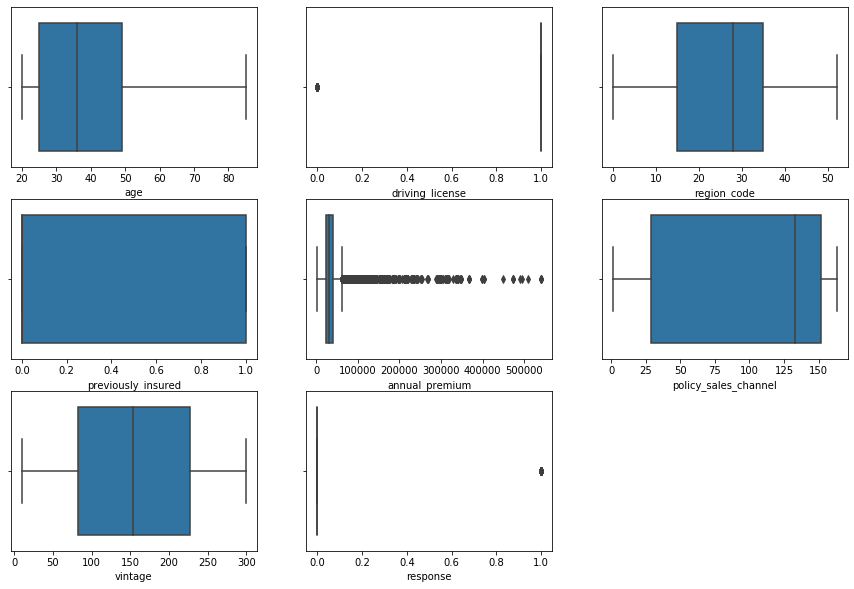

In [9]:
df_describe = df.drop(columns = ['id', 'vehicle_damage', 'gender','vehicle_age'])


plt.figure(figsize = (15, 10))
x = 1      

for column in df_describe.describe():
    plt.subplot(3,3,x)
    sns.boxplot(df[column])
    x += 1

##### We can see that there's many outliers in this dataset in the annual premium columns
##### We will be handling it by making a bin for the annual premium 
##### We will not removing the outliers of annual premium since it might hold valueable information related to response 
##### Driving license because it's binary categorical there wouldn't be any outliers



##### Binning the annual premium into groups 

In [10]:
bin_premium_group = [2600, 25000, 50000, 100000, 200000, df['annual_premium'].max()]
label_bin = ['Bronze', 'Silver', 'Gold', 'Platinum', 'Diamond']

df['premium_group'] = pd.cut(df['annual_premium'], bins = bin_premium_group, labels = label_bin)
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,premium_group
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver




##### Binning age into Age Generation 
###### Generation age based on (https://www.weforum.org/agenda/2015/09/how-different-age-groups-identify-with-their-generational-labels/)

In [11]:
bin_age_generation = [18, 34, 50, 69, df['age'].max()]
label_age_generation = ['Millenials', 'Gen X', 'Boomer', 'Silent']

df['Generation'] = pd.cut(df['age'], bins = bin_age_generation, labels = label_age_generation)
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,premium_group,Generation
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver,Gen X
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver,Silent
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver,Gen X
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver,Millenials
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver,Millenials



## Exploratory Data Analysis 

### Univariate 

In [12]:
df.stb.freq(['gender'], cum_cols = False)

,gender,count,percent
0,Male,206089,54.07613
1,Female,175020,45.92387


##### Gender - 54 % of the customer of the health insurance is male 

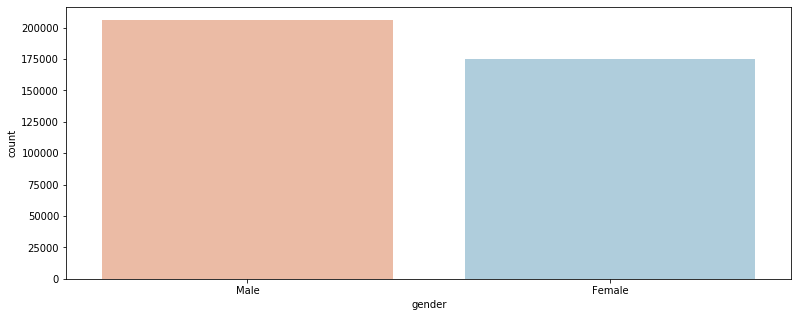

In [13]:
plt.figure(figsize = (13, 5))
sns.countplot(df['gender'], palette = 'RdBu')
plt.show()

In [14]:
df['age'].mean()

38.822583565331705

##### The average age for health insurance customers is around 38 - 39

In [15]:
df.stb.freq(['driving_license'], cum_cols=False)

,driving_license,count,percent
0,1,380297,99.786938
1,0,812,0.213062


##### Almost everyone in this dataset has a driving license 

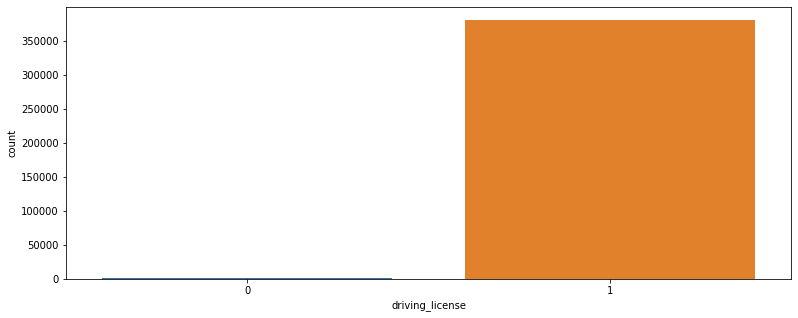

In [16]:
plt.figure(figsize = (13, 5))
sns.countplot(df['driving_license'])

In [17]:
df.stb.freq(['region_code'], cum_cols=False).head()

,region_code,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914


##### Region code 28 has the highest number of health insurance customers
##### While region 52 has the lowest number of health insurance customers 

In [18]:
df.stb.freq(['previously_insured'], cum_cols=False).head()

,previously_insured,count,percent
0,0,206481,54.178988
1,1,174628,45.821012


##### More than half of the customers does not have a vehicle insurance 

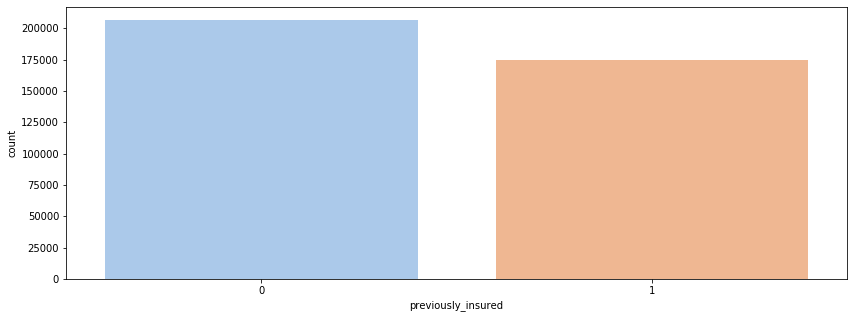

In [19]:
plt.figure(figsize = (14, 5))
sns.countplot(df['previously_insured'], palette = 'pastel')

In [20]:
df.stb.freq(['vehicle_age'], cum_cols=False)

,vehicle_age,count,percent
0,1-2 Year,200316,52.561341
1,< 1 Year,164786,43.238549
2,> 2 Years,16007,4.200111


##### 95 % of health insurance customers have vehichle that's less than 2 years of age 

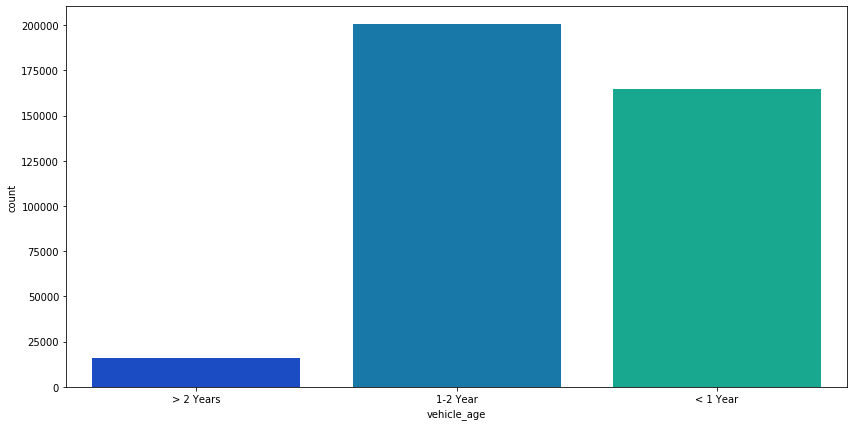

In [21]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['vehicle_age'], palette = 'winter')

In [22]:
df.stb.freq(['vehicle_damage'], cum_cols=False)

,vehicle_damage,count,percent
0,Yes,192413,50.487656
1,No,188696,49.512344


##### Half of the health insurance customer have had their vehicle damaged and half have not 

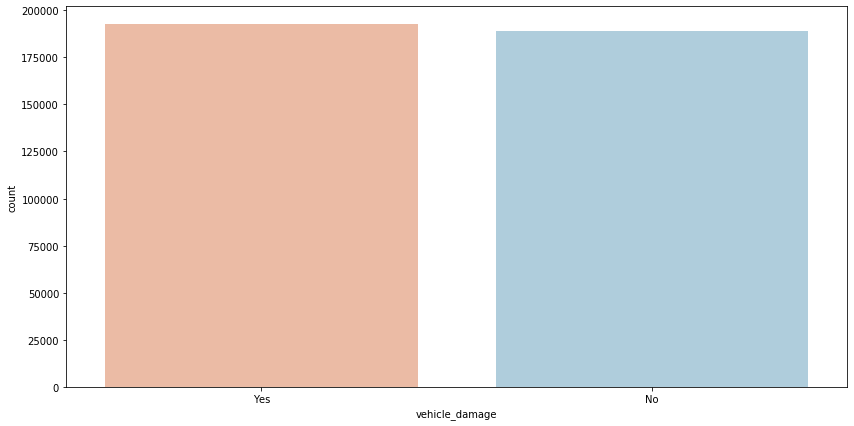

In [23]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['vehicle_damage'], palette = 'RdBu')

In [24]:
df.stb.freq(['policy_sales_channel'], cum_cols=False).head()

,policy_sales_channel,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362


##### Sales channel 152 have the most success selling health insurance product 

In [25]:
df.stb.freq(['response'], cum_cols=False).head()

,response,count,percent
0,0,334399,87.743664
1,1,46710,12.256336


##### Only 12 percent that's interested in buying vehicle insurance 

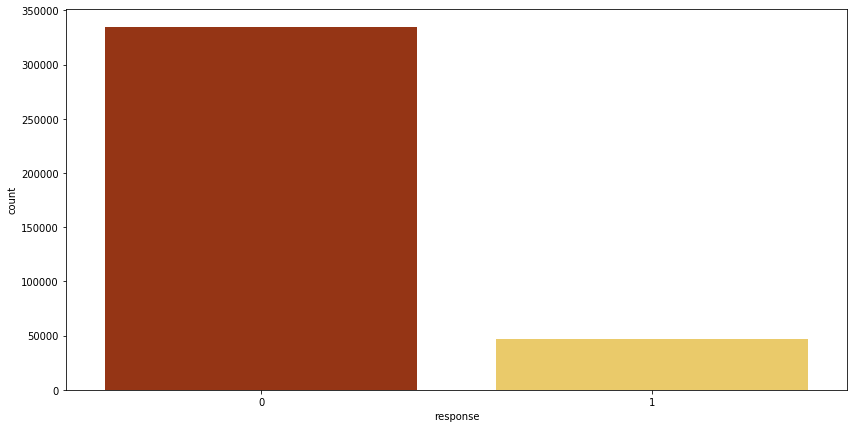

In [26]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['response'], palette = 'afmhot')

In [27]:
df.stb.freq(['premium_group'], cum_cols=False).head()


,premium_group,count,percent
0,Silver,247942,65.058028
1,Bronze,100963,26.491896
2,Gold,31426,8.245935
3,Platinum,666,0.174753
4,Diamond,112,0.029388


##### Silver premium seems to be the most popular among health insurance customers 

##### Premium Group 
    ##### Bronze : 2600 - 25000
    ##### Silver = 25001 - 50000
    ##### Gold = 50001 - 100000
    ##### Platinum = 100001 - 200000
    ##### Diamond = 200001 >
    
##### There's only a few customers that has platinum and diamond premium

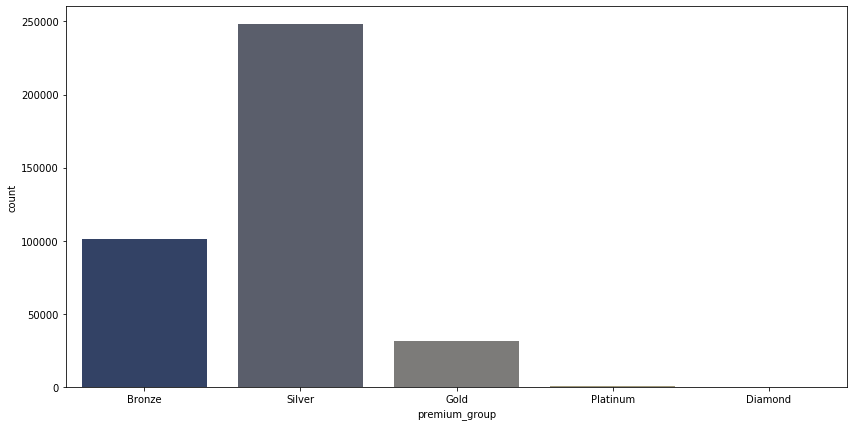

In [28]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['premium_group'], palette = 'cividis')

In [29]:
df.stb.freq(['Generation'], cum_cols=False).head()


,Generation,count,percent
0,Millenials,181876,47.722830
1,Gen X,110689,29.043922
2,Boomer,70794,18.575788
3,Silent,17750,4.657460


##### The older generation are less likely to have a health insurance 
##### Millenial generation are the highest customer of health insurance 
##### Generation Group :
    ##### Millenials : 18 - 34
    ##### Gen X : 35 - 50
    ##### Boomer : 51 - 69
    ##### Silent : 70 and Above

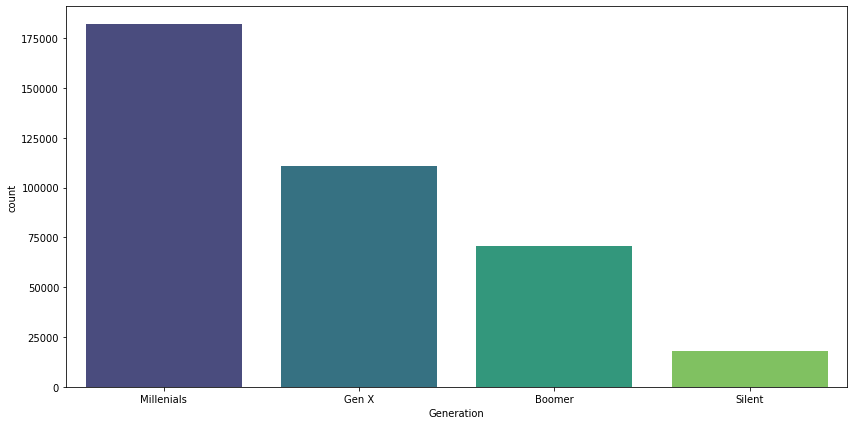

In [30]:
plt.figure(figsize = (14 ,7))
sns.countplot(df['Generation'], palette = 'viridis')

In [31]:
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response,premium_group,Generation
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,Silver,Gen X
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,Silver,Silent
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,Silver,Gen X
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,Silver,Millenials
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,Silver,Millenials


### Multivariate 

##### Since our target column is response first we are going to crosstab the response column with all the feature before we dig deeper to other analysis

In [32]:
pd.crosstab(index = df['response'], columns = df['gender'], normalize = 'index')

gender,Female,Male
response,,
0,0.469006,0.530994
1,0.389317,0.610683


##### Gender and Response
##### Male are more likely  to be interested to vehicle insurance compared to women
##### 61% of interested response are from male respondents

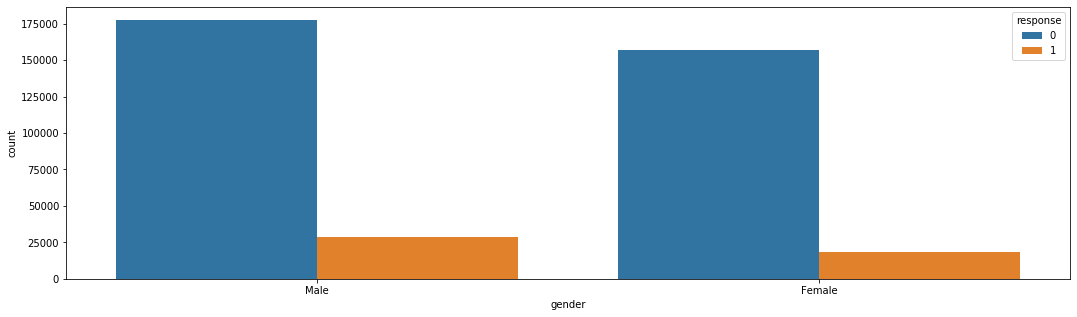

In [33]:
plt.figure(figsize = (18, 5))
sns.countplot(df['gender'], hue = df['response'])
plt.show()

In [34]:
pd.crosstab(index = df['response'], columns = 'Average Age', values = df['age'], aggfunc='mean')

col_0,Average Age
response,
0,38.178227
1,43.435560


##### Average age and Response
##### The average age of customer who is interested with vehicle insurance is 43 years old 
##### While for customers who's not interested are 38 yo
##### This might show that younger customers are not interested with vehicle insurance

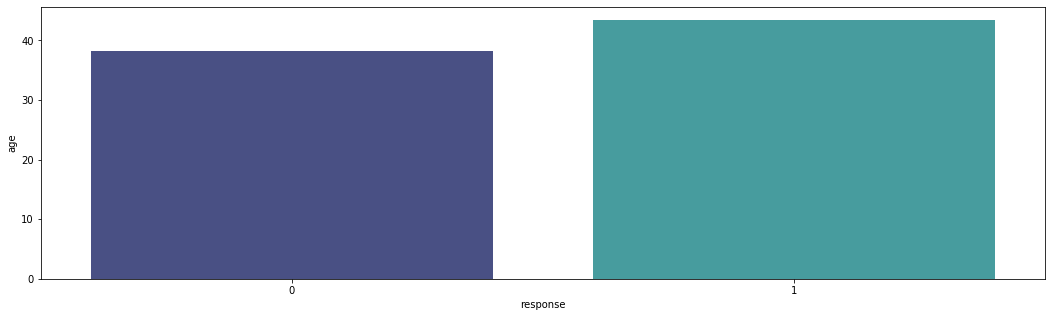

In [35]:
plt.figure(figsize = (18, 5))
sns.barplot(x = df['response'], y = df['age'], palette = 'mako', ci = False)
plt.show()

In [36]:
### average age and Previously Insured

pd.crosstab(index = df['previously_insured'], columns = 'Average Age', values = df['age'], aggfunc='mean')

# The Average age of customer that has a vehicle insurance is 34.5 
# and the average age of customer that does not have a vehicle insurance is 42.4

# this tells that young customer will probably have a vehicle insurance compared to the older customers

col_0,Average Age
previously_insured,
0,42.45564
1,34.52684


##### Average age and Previously Insured
##### The Average age of customer that has a vehicle insurance is 34.5 and the average age of customer that does not have a vehicle insurance is 42.4
##### This tells that young customer will probably have a vehicle insurance compared to the older customers

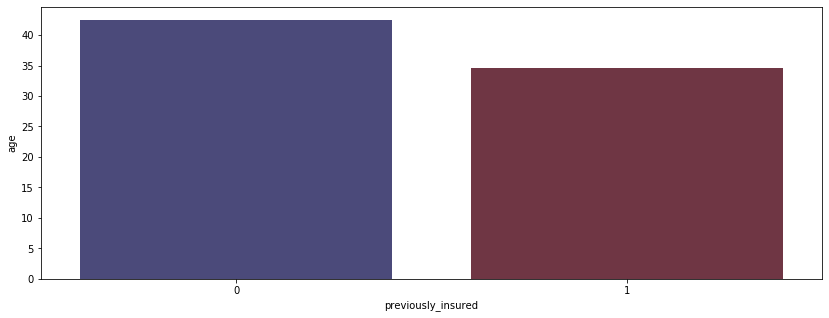

In [37]:
plt.figure(figsize = (14, 5))
sns.barplot(x = df['previously_insured'], y = df['age'], palette = 'icefire', ci = False)
plt.show()

In [38]:
pd.crosstab(index = df['response'], columns = df['previously_insured'], normalize = 'columns')


previously_insured,0,1
response,,
0,0.774546,0.999095
1,0.225454,0.000905


##### Almost every customer who already have a vehicle insurance is not interested with another vehicle insurance out of all customer who does not have a vehicle insurance almost a quarter of them are intersted with vehicle insurance

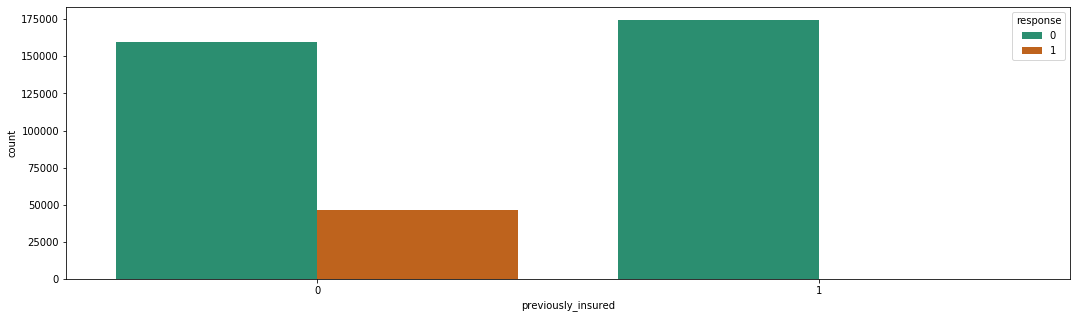

In [39]:
plt.figure(figsize = (18, 5))
sns.countplot(df['previously_insured'], hue = df['response'], palette = 'Dark2')
plt.show()

In [40]:
pd.crosstab(index = df['response'], columns = df['vehicle_age'], normalize = 'columns')

vehicle_age,1-2 Year,< 1 Year,> 2 Years
response,,,
0,0.826245,0.956295,0.706254
1,0.173755,0.043705,0.293746


##### From the vehicle age group customer who has a newer vehicle are less likely to be interested with vehicle insurance customer who has a vehicle that's older than 2 years are more likely to be interested to vehicle insurance 

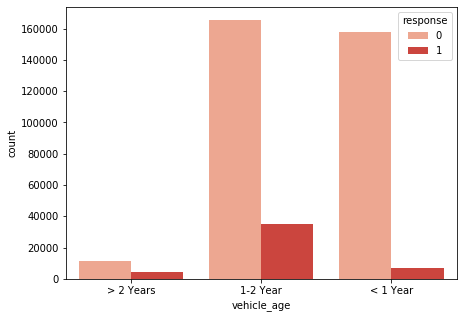

In [73]:
plt.figure(figsize = (7, 5))
sns.countplot(df['vehicle_age'], hue = df['response'], palette = 'Reds')
plt.show()

In [42]:
pd.crosstab(index = df['previously_insured'], columns = df['vehicle_age'], normalize = 'columns')

vehicle_age,1-2 Year,< 1 Year,> 2 Years
previously_insured,,,
0,0.67389,0.336976,0.997126
1,0.32611,0.663024,0.002874


##### The newer the vehicle the more likely it's insured, this columns below showed that 66.3% of car aged 1 or below are insured

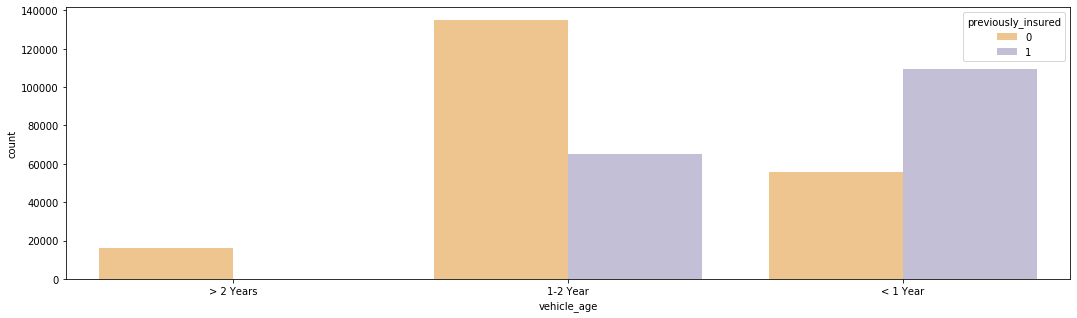

In [43]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_age'], hue = df['previously_insured'], palette = 'PuOr')
plt.show()

In [44]:
pd.crosstab(index = df['response'], columns = [df['vehicle_age'], df['previously_insured']], normalize = 'columns')

vehicle_age         1-2 Year            < 1 Year           > 2 Years          
previously_insured         0         1         0         1         0         1
response                                                                      
0                   0.742864  0.998546  0.871419  0.999433   0.70547  0.978261
1                   0.257136  0.001454  0.128581  0.000567   0.29453  0.021739

##### Customer who has a  newer car are more likely to have their vehicle insured this could be an insight that insurance company needs to work with a dealership to have a bundling product of vehicle & insurance

In [45]:
pd.crosstab(index = df['response'], columns = df['vehicle_damage'], normalize = 'index')

vehicle_damage,No,Yes
response,,
0,0.561347,0.438653
1,0.021023,0.978977


##### Customer who're intersted with vehicle insurance 98% have had a vehicle damage in the past

In [46]:
pd.crosstab(index = df['response'], columns = df['vehicle_damage'], normalize = 'columns')

vehicle_damage,No,Yes
response,,
0,0.994796,0.762345
1,0.005204,0.237655


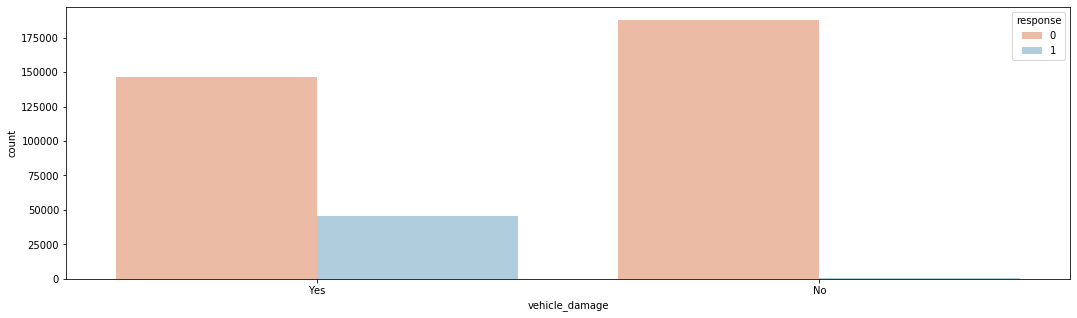

In [47]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_damage'], hue = df['response'], palette = 'RdBu')
plt.show()

In [48]:
pd.crosstab(index = df['previously_insured'], columns = df['vehicle_damage'], normalize = 'columns')

vehicle_damage,No,Yes
previously_insured,,
0,0.127136,0.948434
1,0.872864,0.051566


##### Almost 95 % customer who have had their vehicle previously damaged doesn't have a vehicle insurance, while 87 % of customer who had never have any vehicle damaged have a vehicle insurance. 
##### People who have vehicle insurance are more likely to be careful to their vehicle.

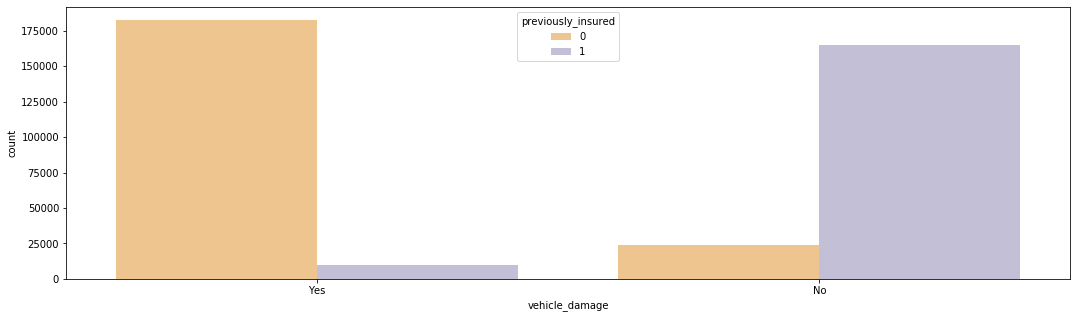

In [49]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_damage'], hue = df['previously_insured'], palette = 'PuOr')
plt.show()

In [50]:
pd.crosstab(index = df['vehicle_age'], columns = df['vehicle_damage'], normalize = 'index')

vehicle_damage,No,Yes
vehicle_age,,
1-2 Year,0.359886,0.640114
< 1 Year,0.707524,0.292476
> 2 Years,0.000937,0.999063


##### Cars that's more than 2 years of age are the most likely to have had a vehicle damage 
##### The younger the vehicle the less likely that the vehicle has a vehicle damage

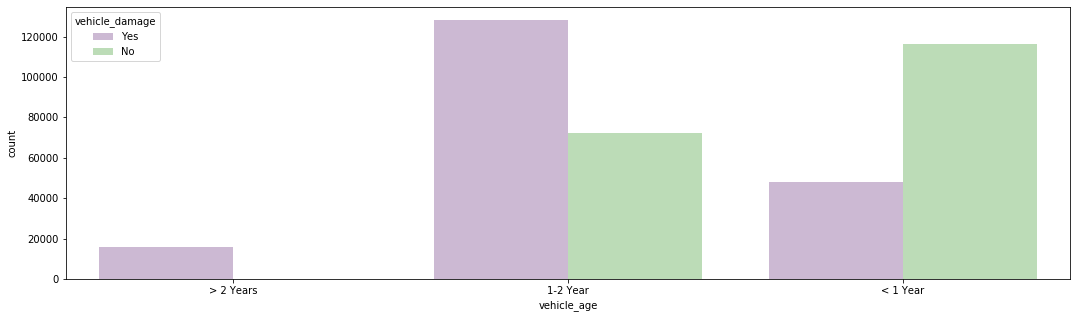

In [51]:
plt.figure(figsize = (18, 5))
sns.countplot(df['vehicle_age'], hue = df['vehicle_damage'], palette = 'PRGn')
plt.show()

In [52]:
pd.crosstab(index = df['response'], columns = [df['vehicle_damage'], df['previously_insured']], normalize = 'index')

vehicle_damage            No                 Yes          
previously_insured         0         1         0         1
response                                                  
0                   0.069019  0.492328  0.409239  0.029414
1                   0.019482  0.001541  0.977136  0.001841


##### Customer who never had any vehicle damage and has a vehicle insurance are the most likely not interested in another vehicle insurance
##### From all the customer who is interested 97% of them does not have vehicle insurance and had a vehicle damage in the past
##### Targeting customer who does not have a vehicle insurance and have had a vehicle damage in the past

In [53]:
pd.crosstab(index = df['response'], columns = 'Median Premium', values = df['annual_premium'], aggfunc='median')

col_0,Median Premium
response,
0,31504.0
1,33002.0


##### The median of customer premium doesn't really differentitate of the responses

In [54]:
pd.crosstab(index = df['response'], columns = 'Average Vintage', values = df['vintage'], aggfunc='median')

# customer loyalty doesn't have any effect on the response towards vehicle insurance

col_0,Average Vintage
response,
0,154
1,154


In [55]:
pd.crosstab(index = df['response'], columns = df['premium_group'], normalize = 'columns')

premium_group,Bronze,Silver,Gold,Platinum,Diamond
response,,,,,
0,0.882918,0.879044,0.848024,0.848348,0.803571
1,0.117082,0.120956,0.151976,0.151652,0.196429


##### The more expensive the premium group the more likely the customer are interested with the vehicle insurance
##### Assumption:
    1. Customer who has more expensive premium group are more likely have a higher income
    2. The higher the income the more likely they have money to spend 

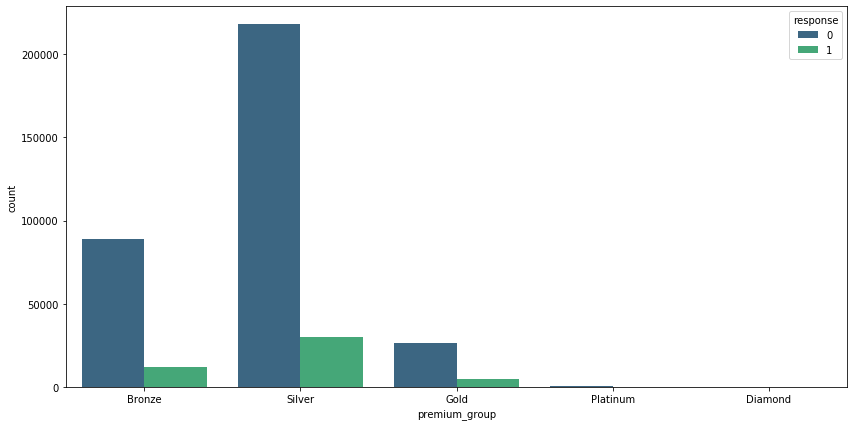

In [56]:
plt.figure(figsize = (14, 7))
sns.countplot(df['premium_group'], hue = df['response'], palette = 'viridis')

##### Eventhough platinum and diamond has a higher percentage of intersted responds, however there're only few numbers of customers are in those premium_group

In [57]:
pd.crosstab(index = df['response'], columns = [df['premium_group'], df['previously_insured']], normalize = 'columns')


premium_group         Bronze              Silver                Gold  \
previously_insured         0         1         0         1         0   
response                                                               
0                   0.791091  0.998879  0.771191  0.999148  0.749921   
1                   0.208909  0.001121  0.228809  0.000852  0.250079   

premium_group                 Platinum        Diamond       
previously_insured         1         0    1         0    1  
response                                                    
0                   0.999353  0.720994  1.0  0.706667  1.0  
1                   0.000647  0.279006  0.0  0.293333  0.0

##### For customer who does not have vehicle insurance before : 
The more expensive the premium group the more likely the customer are interested with the vehicle insurance
    
##### While for customer who's previously have vehicle insurance :
The more expensive the group the less likely they will sign 


In [58]:
pd.crosstab(index = df['response'], columns = [df['premium_group'], df['vehicle_damage']], normalize = 'columns')

premium_group     Bronze              Silver                Gold            \
vehicle_damage        No       Yes        No       Yes        No       Yes   
response                                                                     
0               0.991645  0.779109  0.995756  0.758805  0.997425  0.739765   
1               0.008355  0.220891  0.004244  0.241195  0.002575  0.260235   

premium_group  Platinum           Diamond            
vehicle_damage       No       Yes      No       Yes  
response                                             
0               0.99373  0.714697     1.0  0.681159  
1               0.00627  0.285303     0.0  0.318841

In [59]:
pd.crosstab(index = df['response'], columns = df['Generation'], normalize = 'columns')

Generation,Millenials,Gen X,Boomer,Silent
response,,,,
0,0.938788,0.78614,0.85075,0.924563
1,0.061212,0.21386,0.14925,0.075437


##### Generation and Response
##### Millenials shown to be the generation that's less likely to be intersted in vehicle insurance  WHY?  Gen X and Boomer are 2 generation that's most likely to be interested with vehicle insurance

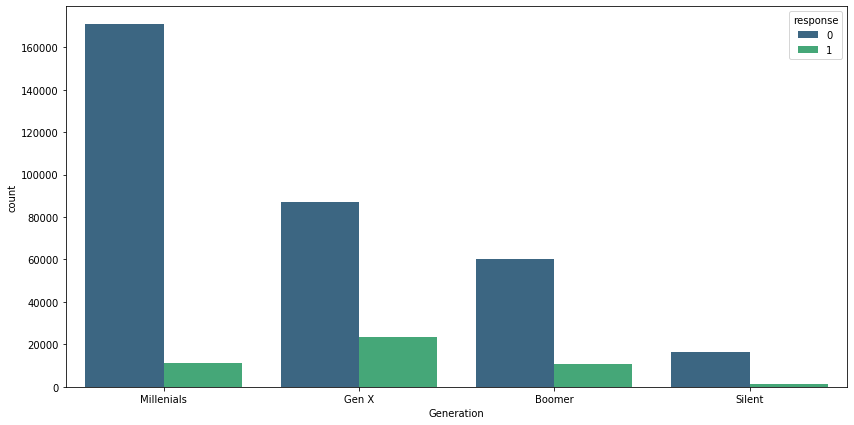

In [60]:
plt.figure(figsize = (14, 7))
sns.countplot(df['Generation'], hue = df['response'], palette = 'viridis')

In [61]:
pd.crosstab(index = df['Generation'], columns = [df['vehicle_damage'], df['response']], normalize = 'columns')

vehicle_damage        No                 Yes          
response               0         1         0         1
Generation                                            
Millenials      0.645780  0.503055  0.337601  0.232658
Gen X           0.187306  0.373727  0.353526  0.509644
Boomer          0.128424  0.112016  0.246249  0.228656
Silent          0.038489  0.011202  0.062624  0.029041

##### Out of all customers that have had vehicle damage in the past Gen X are more likely to response interested to vehicle insurance

In [62]:
pd.crosstab(index = df['Generation'], columns = df['vehicle_damage'], normalize = 'index')

vehicle_damage,No,Yes
Generation,,
Millenials,0.669225,0.330775
Gen X,0.320962,0.679038
Boomer,0.342077,0.657923
Silent,0.407662,0.592338


##### Gen X in generation with the highest vehicle damage percentage 

In [63]:
pd.crosstab(index = df['Generation'], columns = df['previously_insured'], normalize = 'index')

previously_insured,0,1
Generation,,
Millenials,0.372012,0.627988
Gen X,0.720279,0.279721
Boomer,0.681428,0.318572
Silent,0.611437,0.388563


##### This shows that maybe why millenial is not interested in vehicle insurance is because 62.7 % of millenials already have vehicle insurance this shows that Gen X generation the less likely they have a vehicle insurance before 

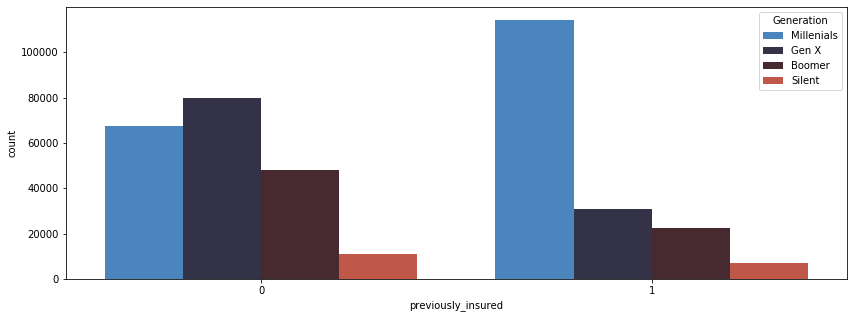

In [64]:
plt.figure(figsize = (14, 5))
sns.countplot(x = df['previously_insured'], hue = df['Generation'], palette = 'icefire')
plt.show()

In [65]:
pd.crosstab(index = df['response'], columns = [df['Generation'], df['previously_insured']], normalize = 'index')

Generation         Millenials               Gen X              Boomer  \
previously_insured          0         1         0         1         0   
response                                                                
0                    0.169271  0.341326  0.167826  0.092393  0.112704   
1                    0.236694  0.001648  0.505374  0.001413  0.225926   

Generation                      Silent            
previously_insured         1         0         1  
response                                          
0                   0.067405  0.028457  0.020619  
1                   0.000278  0.028623  0.000043

##### This table below shows that millenial who has a vehicle insurance are most likely not to be interested in vehicle insurance 

In [66]:
pd.crosstab(index = df['Generation'], columns = df['vehicle_age'], normalize = 'index')

vehicle_age,1-2 Year,< 1 Year,> 2 Years
Generation,,,
Millenials,0.097539,0.901339,0.001122
Gen X,0.940816,0.005095,0.054088
Boomer,0.886332,0.003757,0.109910
Silent,0.884000,0.001352,0.114648


##### Majority of millenials 90.1% have a vehicle age below one year, and from our analysis before majority of vehicle that's less then 1 year of age is already insured
##### There's less than one percent of millenials who has cars over 2 years

##### This open up on how to target millenial customers by working with a dealership that sells new car, and bundling it with an insurance product to get the millenial generation market and since almost 94% millenials says they're not interested with vehicle insurance product this kind of partnership with dealer will catch the market of millenial that we're missing

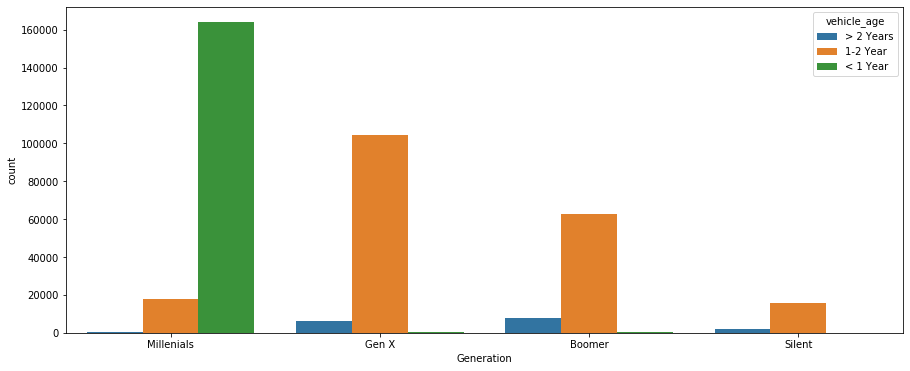

In [67]:
plt.figure(figsize = (15, 6))
sns.countplot(df['Generation'], hue = df['vehicle_age'])
plt.show()

In [68]:
pd.crosstab(index = df['policy_sales_channel'], columns = df['response'], normalize = 'columns').sort_values(1, ascending = False).head()

response,0,1
policy_sales_channel,,
26.0,0.190817,0.340206
124.0,0.179423,0.299636
152.0,0.391526,0.082595
156.0,0.025012,0.049176
157.0,0.014623,0.038407


##### Sales Channel
##### The policy sales channel no 26 and policy sales channel number 124 are the 2 highest percentage of interested response
##### There's no further explanataion on what are this number  :(

In [69]:
pd.crosstab(index = df['policy_sales_channel'], columns = df['response'], normalize = 'columns').sort_values(0, ascending = False).head()

response,0,1
policy_sales_channel,,
152.0,0.391526,0.082595
26.0,0.190817,0.340206
124.0,0.179423,0.299636
160.0,0.063708,0.010169
156.0,0.025012,0.049176


##### Most ineffective sales channel of all sales channel, policy sales channel number 152 seems to be the least effective to offer health insurance customers a vehicle insurance 

In [70]:
top_5_region =  pd.crosstab(index = df['region_code'], columns = df['response']).sort_values(1, ascending = False).head()
top_5_region

response,0,1
region_code,,
28.0,86498,19917
8.0,30620,3257
41.0,16039,2224
46.0,17717,2032
29.0,9700,1365


##### Region 
##### Region 28 has the highest number of customers of all region that's maybe why it has the the highest number of interested response
##### The region 28 has the highest percentage of customers who is interested with vehicle insurance product unfortunately  there's no explanation on each number of region of which is where 

In [71]:
pd.crosstab(index = df['region_code'], columns = df['response'], normalize = 'index').sort_values(1, ascending = False).head()

response,0,1
region_code,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


##### If we compared region to region interested rate, region 38 has the highest percentage of interested while region 28 is on the 2nd place 

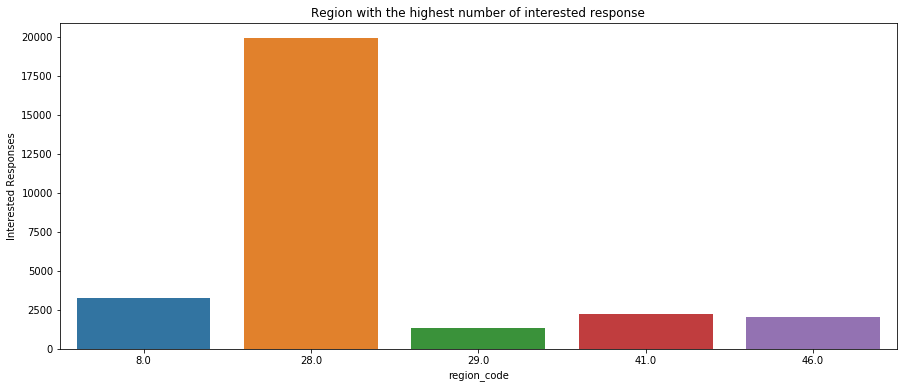

In [72]:
plt.figure(figsize = (15, 6))

sns.barplot(x = top_5_region.index, y = top_5_region[1])
plt.ylabel('Interested Responses')
plt.title('Region with the highest number of interested response')
plt.show()